<a href="https://colab.research.google.com/github/obaileyw-uncc/ecgr5105/blob/main/hw04_supportvectormachines/hw04_supportvectormachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECGR 5105 Homework 4: Support Vector Machines
**Owen Bailey-Waltz (801488178)**

In [1]:
# import required packages, load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from IPython.display import display

## Problem 1: Breast cancer dataset

In [2]:
cancer = datasets.load_breast_cancer()
cancer_data = cancer.data
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# check for nulls (should not be any as this is an example set)
cancer_input.isnull().sum() * 100 / cancer_input.shape[0]

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [4]:
# label data features
labels = cancer.target
(i,) = labels.shape
labels = np.reshape(labels, (i, 1))
cancer_dataset = pd.DataFrame(np.concatenate([cancer_data,labels], axis=1))
cancer_dataset.columns = np.append(cancer.feature_names,'label')
display(cancer_dataset)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [5]:
# split training and validation sets, normalize data
cancer_train, cancer_val = train_test_split(cancer_dataset, train_size=0.8,
                                            test_size=0.2, random_state=0)
y_train = cancer_train.pop('label')
X_train = cancer_train
y_val = cancer_val.pop('label')
X_val = cancer_val
scaler = StandardScaler()
num_vars = X_train.columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_val[num_vars] = scaler.transform(X_val[num_vars])
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
427,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
406,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
96,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
490,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129


### Linear kernel

In [6]:
model = SVC(kernel='linear', C=25)
model.fit(X_train, y_train)

SVC(C=25, kernel='linear')

MODEL: -0.486 + 2.367 * x_1 - 0.072 * x_2 + 0.531 * x_3 - 0.581 * x_4 - 1.230 * x_5 + 2.987 * x_6 - 2.293 * x_7 - 1.120 * x_8 - 0.331 * x_9 - 0.017 * x_10 - 1.309 * x_11 + 0.463 * x_12 + 1.676 * x_13 - 2.780 * x_14 - 0.283 * x_15 - 1.692 * x_16 + 2.059 * x_17 - 2.108 * x_18 + 0.093 * x_19 + 4.659 * x_20 - 1.989 * x_21 - 1.306 * x_22 - 1.544 * x_23 - 3.587 * x_24 + 0.626 * x_25 + 1.683 * x_26 - 1.716 * x_27 + 0.411 * x_28 - 0.443 * x_29 - 3.678 * x_30
Training Accuracy: 0.989010989010989
Validation Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.9629629629629629



Text(50.722222222222214, 0.5, 'Actual')

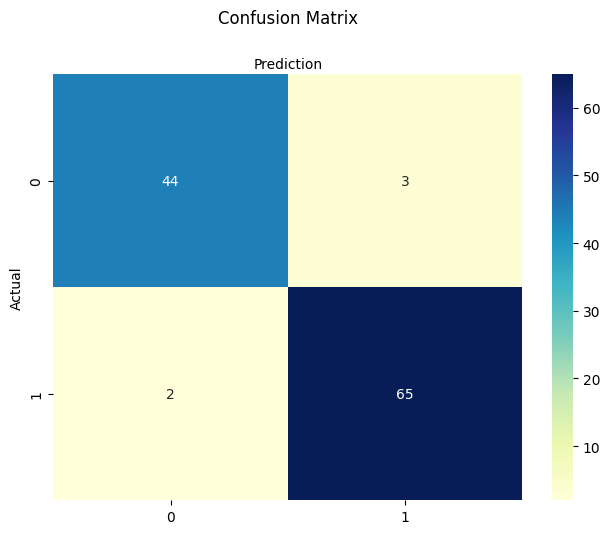

In [7]:
y_pred = model.predict(X_val)
confusion = metrics.confusion_matrix(y_val, y_pred)
training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                    'Validation Accuracy': model.score(X_val, y_val),
                    'Precision': metrics.precision_score(y_val, y_pred),
                    'Recall': metrics.recall_score(y_val, y_pred),
                    'F1 Score': metrics.f1_score(y_val, y_pred)}

print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
coefficients = model.coef_[0]
for i in range(len(coefficients)):
  if coefficients[i] > 0:
    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
  elif coefficients[i] < 0:
    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

# create heatmap for confusion matrix
# code frome example
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

### Polynomial kernel

In [8]:
model = SVC(kernel='poly', C=25)
model.fit(X_train, y_train)

SVC(C=25, kernel='poly')

Training Accuracy: 0.9868131868131869
Validation Accuracy: 0.9736842105263158
Precision: 0.9571428571428572
Recall: 1.0
F1 Score: 0.9781021897810219



Text(50.722222222222214, 0.5, 'Actual')

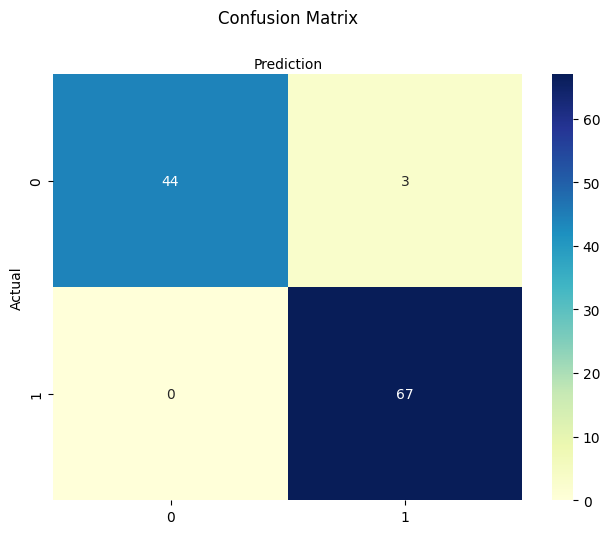

In [9]:
y_pred = model.predict(X_val)
confusion = metrics.confusion_matrix(y_val, y_pred)
training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                    'Validation Accuracy': model.score(X_val, y_val),
                    'Precision': metrics.precision_score(y_val, y_pred),
                    'Recall': metrics.recall_score(y_val, y_pred),
                    'F1 Score': metrics.f1_score(y_val, y_pred)}

#print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
#coefficients = model.coef_[0]
#for i in range(len(coefficients)):
#  if coefficients[i] > 0:
#    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
#  elif coefficients[i] < 0:
#    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
#print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

# create heatmap for confusion matrix
# code frome example
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

### Radial basis function kernel

In [10]:
model = SVC(kernel='rbf', C=25)
model.fit(X_train, y_train)

SVC(C=25)

Training Accuracy: 0.9956043956043956
Validation Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9402985074626866
F1 Score: 0.9692307692307692



Text(50.722222222222214, 0.5, 'Actual')

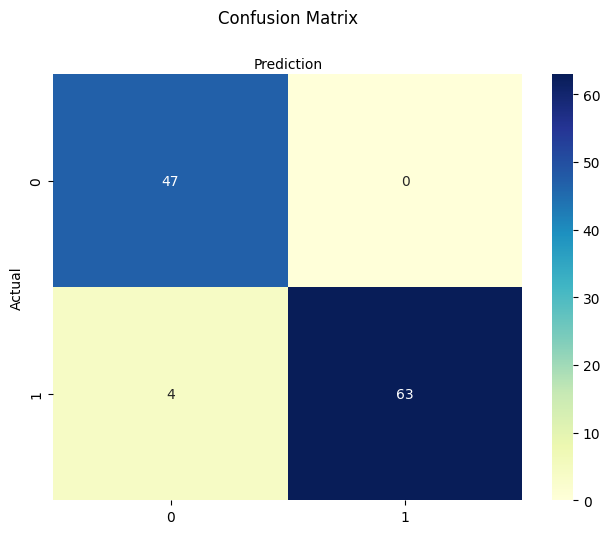

In [11]:
y_pred = model.predict(X_val)
confusion = metrics.confusion_matrix(y_val, y_pred)
training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                    'Validation Accuracy': model.score(X_val, y_val),
                    'Precision': metrics.precision_score(y_val, y_pred),
                    'Recall': metrics.recall_score(y_val, y_pred),
                    'F1 Score': metrics.f1_score(y_val, y_pred)}

#print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
#coefficients = model.coef_[0]
#for i in range(len(coefficients)):
#  if coefficients[i] > 0:
#    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
#  elif coefficients[i] < 0:
#    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
#print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

# create heatmap for confusion matrix
# code frome example
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

### Sigmoid kernel

In [12]:
model = SVC(kernel='sigmoid', C=125)
model.fit(X_train, y_train)

SVC(C=125, kernel='sigmoid')

Training Accuracy: 0.9252747252747253
Validation Accuracy: 0.8859649122807017
Precision: 0.921875
Recall: 0.8805970149253731
F1 Score: 0.9007633587786259



Text(50.722222222222214, 0.5, 'Actual')

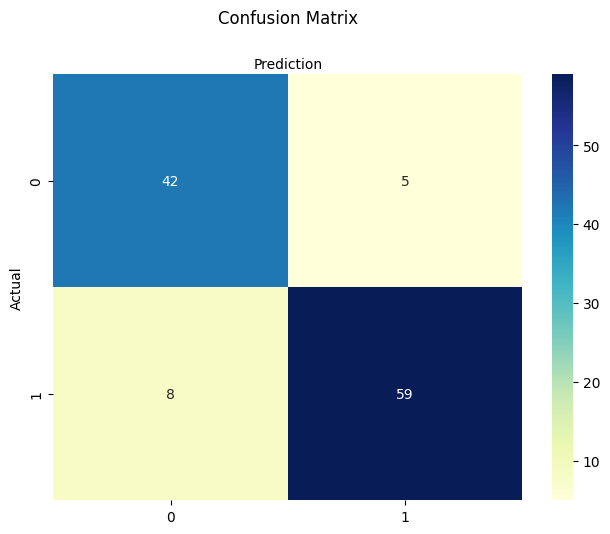

In [13]:
y_pred = model.predict(X_val)
confusion = metrics.confusion_matrix(y_val, y_pred)
training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                    'Validation Accuracy': model.score(X_val, y_val),
                    'Precision': metrics.precision_score(y_val, y_pred),
                    'Recall': metrics.recall_score(y_val, y_pred),
                    'F1 Score': metrics.f1_score(y_val, y_pred)}

#print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
#coefficients = model.coef_[0]
#for i in range(len(coefficients)):
#  if coefficients[i] > 0:
#    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
#  elif coefficients[i] < 0:
#    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
#print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

# create heatmap for confusion matrix
# code frome example
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Problem 2: Housing dataset

In [14]:
drive.mount('/content/drive/')
file_path = '/content/drive/MyDrive/datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Mounted at /content/drive/


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
# perform pre-processing - split training and validation sets, normalize data
housing[housing == 'yes'] = 1
housing[housing == 'no'] = 0
housing_train, housing_val = train_test_split(housing,
                                                 train_size=0.8, test_size=0.2,
                                                 random_state=0)
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking',
            'prefarea']
housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])
housing_val[num_vars] = scaler.transform(housing_val[num_vars])
housing_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,unfurnished
496,2695000,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,unfurnished
484,2870000,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,unfurnished
507,2590000,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,unfurnished
252,4515000,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,semi-furnished


In [16]:
y_train = housing_train.pop('price')
X_train = housing_train[num_vars]
y_val = housing_val.pop('price')
X_val = housing_val[num_vars]


### Linear kernel

In [17]:
model = SVR(kernel='linear', C=100000)
model.fit(X_train, y_train)

SVR(C=100000, kernel='linear')

In [18]:
# support vector regression measures fit quaility with R^2 score
# cannot probe loss during training because SKL does not allow probing of loss
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

sq_err = np.square(np.subtract(y_train_pred, y_train))
J_train = (1 / (2 * len(X_train))) * np.sum(sq_err)
sq_err = np.square(np.subtract(y_val_pred, y_val))
J_val = (1 / (2 * len(X_val))) * np.sum(sq_err)

training_metrics = {'Training R^2': model.score(X_train, y_train),
                    'Validation R^2': model.score(X_val, y_val),
                    'Training Loss': J_train,
                    'Validation Loss': J_val}

print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
coefficients = model.coef_[0]
for i in range(len(coefficients)):
  if coefficients[i] > 0:
    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
  elif coefficients[i] < 0:
    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

MODEL: 4709918.122 + 527776.788 * x_1 + 86534.126 * x_2 + 441136.556 * x_3 + 444871.952 * x_4 + 130501.495 * x_5 + 164751.775 * x_6 + 112646.049 * x_7 + 185023.418 * x_8 + 342796.483 * x_9 + 164643.058 * x_10 + 318915.305 * x_11
Training R^2: 0.6625543331345585
Validation R^2: 0.6724225377064308
Training Loss: 614856716090.8912
Validation Loss: 471960204850.7686



### Polynomial kernel

In [19]:
model = SVR(kernel='poly', C=100000)
model.fit(X_train, y_train)

SVR(C=100000, kernel='poly')

In [20]:
# support vector regression measures fit quaility with R^2 score
# cannot probe loss during training because SKL does not allow probing of loss
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

sq_err = np.square(np.subtract(y_train_pred, y_train))
J_train = (1 / (2 * len(X_train))) * np.sum(sq_err)
sq_err = np.square(np.subtract(y_val_pred, y_val))
J_val = (1 / (2 * len(X_val))) * np.sum(sq_err)

training_metrics = {'Training R^2': model.score(X_train, y_train),
                    'Validation R^2': model.score(X_val, y_val),
                    'Training Loss': J_train,
                    'Validation Loss': J_val}

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

Training R^2: 0.6050643907278781
Validation R^2: 0.4935883588772938
Training Loss: 719608623337.9957
Validation Loss: 729617172712.8564



### Radial basis function kernel

In [21]:
model = SVR(kernel='rbf', C=1750000)
model.fit(X_train, y_train)

SVR(C=1750000)

In [22]:
# support vector regression measures fit quaility with R^2 score
# cannot probe loss during training because SKL does not allow probing of loss
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

sq_err = np.square(np.subtract(y_train_pred, y_train))
J_train = (1 / (2 * len(X_train))) * np.sum(sq_err)
sq_err = np.square(np.subtract(y_val_pred, y_val))
J_val = (1 / (2 * len(X_val))) * np.sum(sq_err)

training_metrics = {'Training R^2': model.score(X_train, y_train),
                    'Validation R^2': model.score(X_val, y_val),
                    'Training Loss': J_train,
                    'Validation Loss': J_val}

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

Training R^2: 0.7848586847431868
Validation R^2: 0.5609442218228046
Training Loss: 392007056493.119
Validation Loss: 632573601244.0276



### Sigmoid kernel

In [23]:
model = SVR(kernel='sigmoid', C=125000)
model.fit(X_train, y_train)

SVR(C=125000, kernel='sigmoid')

In [24]:
# support vector regression measures fit quaility with R^2 score
# cannot probe loss during training because SKL does not allow probing of loss
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

sq_err = np.square(np.subtract(y_train_pred, y_train))
J_train = (1 / (2 * len(X_train))) * np.sum(sq_err)
sq_err = np.square(np.subtract(y_val_pred, y_val))
J_val = (1 / (2 * len(X_val))) * np.sum(sq_err)

training_metrics = {'Training R^2': model.score(X_train, y_train),
                    'Validation R^2': model.score(X_val, y_val),
                    'Training Loss': J_train,
                    'Validation Loss': J_val}

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

Training R^2: 0.6071944779624667
Validation R^2: 0.6192539162620936
Training Loss: 715727410536.5033
Validation Loss: 548563379235.25665

